In [1]:
import pandas as pd #pandas (pd): Data manipulation ke liye use hota hai, jaise CSV file load karna aur process karna.

import plotly.express as px #plotly.express (px): Data visualization library jo easy aur quick plots banata hai.
import plotly.graph_objects as go #plotly.graph_objects (go): Advanced and customizable graphs banane ke liye
import plotly.io as pio   #plotly.io (pio): Graph templates ko customize karne ke liye
import plotly.colors as colors 
pio.templates.default = "plotly_white"  #pio.templates.default = "plotly_white": Default theme white rakha gaya hai graphs ke liye
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Superstore_Data.csv" , encoding='latin-1') 
#encoding='latin-1': Special characters ko properly read karne ke liye encoding use hui hai
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Let’s start by looking at the descriptive statistics of the dataset

In [3]:
data.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column
to create new columns like order month, order year, and order day,
which will be very valuable for sales and profit analysis 
according to time periods. So let’s add these columns:

In [4]:
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting Date Columns

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 
#Date Conversion: Order Date aur Ship Date columns ko datetime format me convert kiya gaya hai for date-based analysis.


# Adding New Date-Based Columns

In [7]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

#Order Month: Order date se month extract karte hain.
#Order Year: Order date se year extract hota hai.
#Order Day of Week: Week ka day (0 for Monday, 6 for Sunday) extract kiya gaya hai.


In [8]:
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# 1️⃣ Monthly Sales Analysis
## Calculate monthly sales and identify the month with highest and lowest sales.

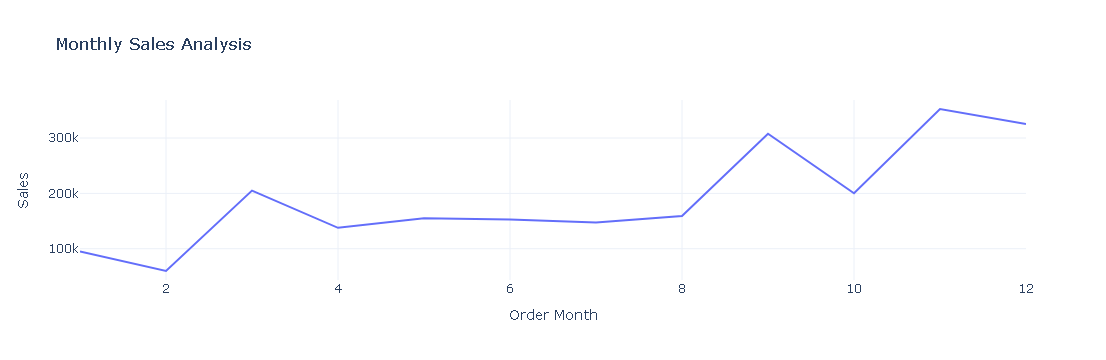

In [9]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month, 
              x='Order Month', 
              y='Sales', 
              title='Monthly Sales Analysis')
fig.show()


In [10]:
import plotly.express as px

# Monthly Sales Grouping (Already correct)
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()

# ✅ Bar Chart Plot
fig = px.bar(
    sales_by_month, 
    x='Order Month', 
    y='Sales', 
    title='📊 Monthly Sales Analysis',
    color='Sales',  # optional: color intensity based on sales
    color_continuous_scale='armyrose'  # choose color theme
)

fig.update_layout(xaxis_title='Month', yaxis_title='Total Sales ', xaxis_tickangle=-45)
fig.show()



In [11]:
#Data Grouping:
#data.groupby('Order Month')['Sales'].sum() se har month ki total sales nikalte hain.
#.reset_index() data ko structured format me rakhta hai.
#px.line: Monthly sales trend show karne ke liye line chart banaya gaya hai.
#fig.show(): Graph display karta hai.


# 2️⃣ Sales by Product Category
## Identify which product category has the highest and lowest sales.

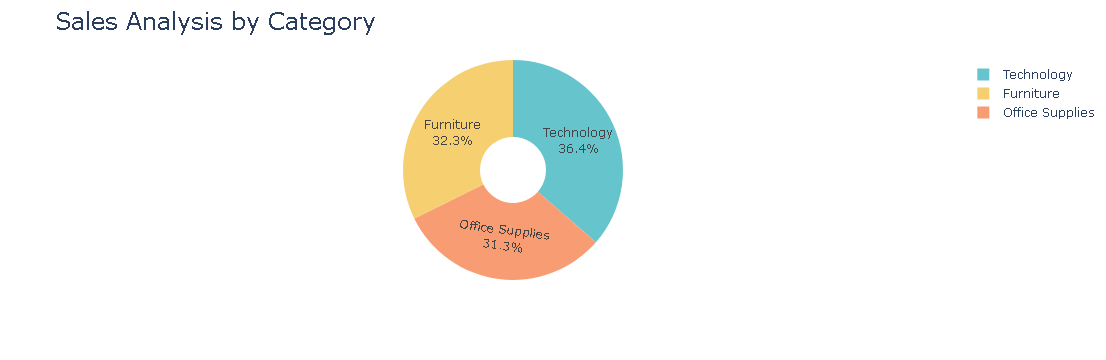

In [12]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.3, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()


In [13]:
#groupby('Category'): Category-wise sales nikalte hain.
#Pie Chart:
#px.pie: Sales proportions ko pie chart me show karta hai.
#hole=0.5: Donut-style chart banata hai.
#Pastel Colors: Chart me soft color palette use kiya gaya hai.


# 3️⃣ Sales by Sub-Category
### Analyze sales across all product sub-categories.

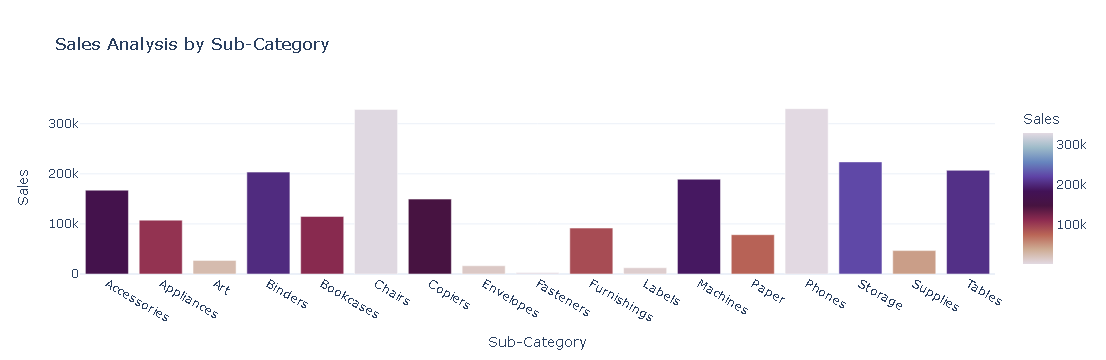

In [14]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category',
             color='Sales',
    color_continuous_scale='twilight_r')
fig.show()


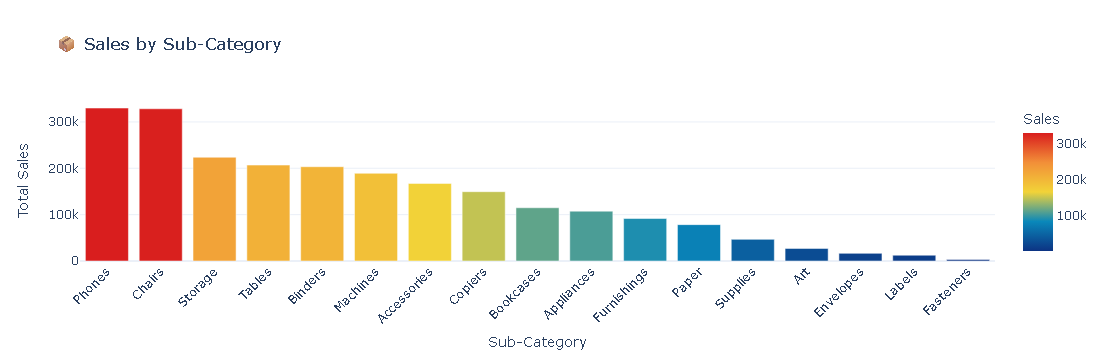

In [15]:
import pandas as pd
import plotly.express as px

# Step 1: Clean column names (just in case)
data.columns = data.columns.str.strip()

# Step 2: Group sales by sub-category
subcat_sales = data.groupby('Sub-Category')['Sales'].sum().reset_index()

# Step 3: Sort descending
subcat_sales = subcat_sales.sort_values(by='Sales', ascending=False)

# Step 4: Bar chart
fig = px.bar(
    subcat_sales,
    x='Sub-Category',
    y='Sales',
    title='📦 Sales by Sub-Category',
    color='Sales',
    color_continuous_scale='portland'
)
fig.update_layout(
    xaxis_title='Sub-Category',
    yaxis_title='Total Sales ',
    xaxis_tickangle=-45
)
fig.show()


# 4️⃣ Monthly Profit Analysis
### Calculate monthly profit and determine the highest profit month.

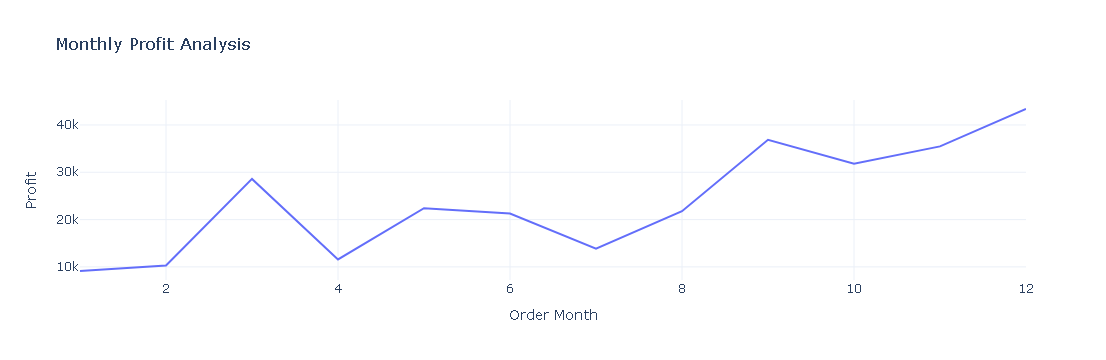

In [16]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x='Order Month', 
              y='Profit', 
              title='Monthly Profit Analysis')
fig.show()


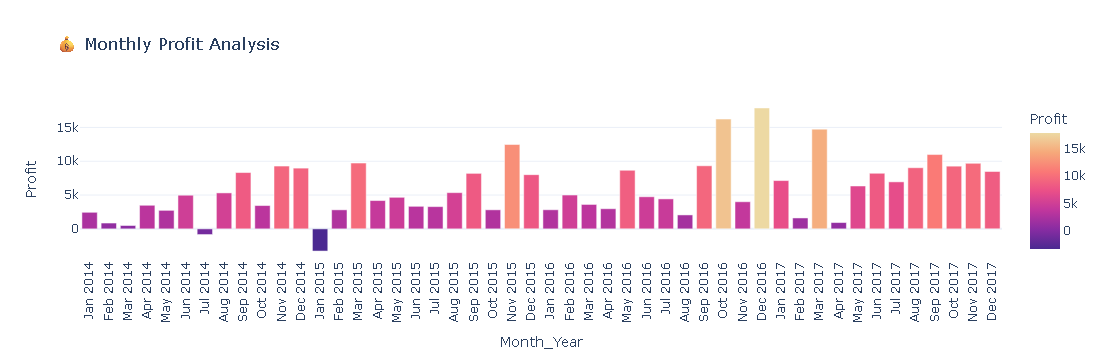

In [17]:
import pandas as pd
import plotly.express as px
import calendar
from pandas.tseries.offsets import MonthBegin

# Step 1: Clean columns
data.columns = data.columns.str.strip()

# Step 2: Convert numeric month to short name
data['Month_Abbr'] = data['Order Month'].apply(lambda x: calendar.month_abbr[int(x)])

# Step 3: Create Month-Year label
data['Month_Year'] = data['Month_Abbr'] + " " + data['Order Year'].astype(str)

# Step 4: Group by Month-Year and sum Profit
monthly_profit = data.groupby('Month_Year')['Profit'].sum().reset_index()

# Step 5: Sort chronologically
monthly_profit['Date'] = pd.to_datetime(monthly_profit['Month_Year'], format='%b %Y') + MonthBegin(0)
monthly_profit = monthly_profit.sort_values('Date')

# Step 6: Bar chart
fig = px.bar(
    monthly_profit,
    x='Month_Year',
    y='Profit',
    title='💰 Monthly Profit Analysis',
    color='Profit',
    color_continuous_scale='Agsunset'
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()


# Profit Analysis by Category
# 5️⃣ Profit by Category and Sub-Category
## Analyze total profit by category and sub-category.

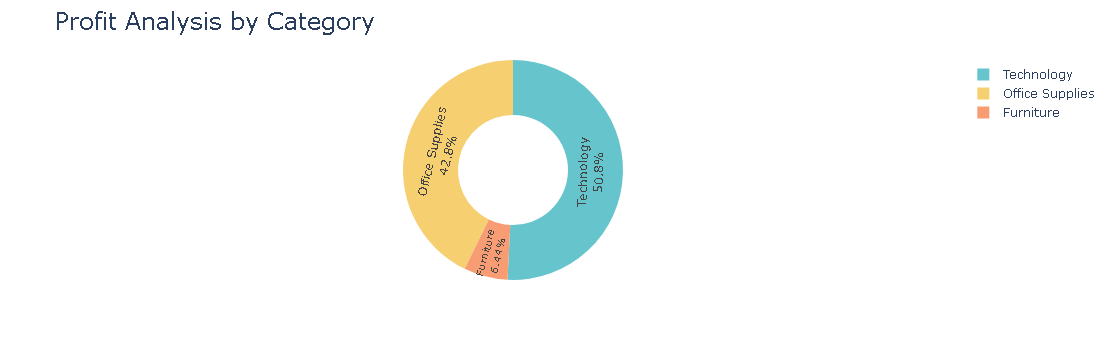

In [18]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))

fig.show()


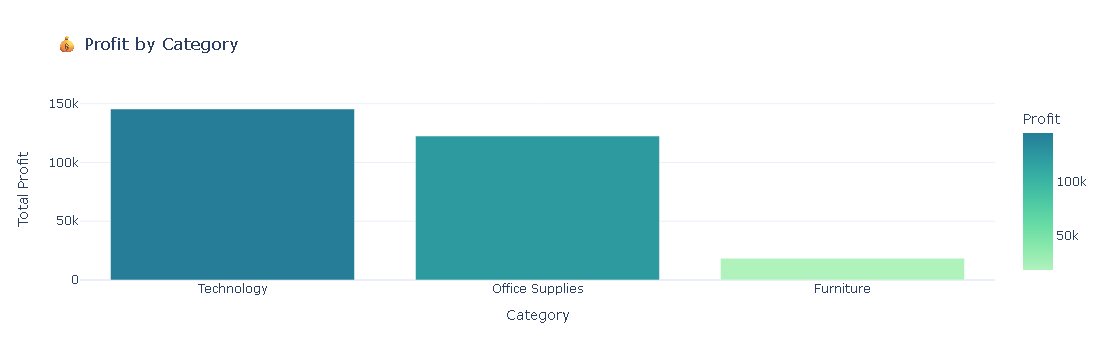

In [19]:
# Group by Category
category_profit = data.groupby('Category')['Profit'].sum().reset_index()

# Sort
category_profit = category_profit.sort_values(by='Profit', ascending=False)

# Plot
fig = px.bar(
    category_profit,
    x='Category',
    y='Profit',
    title='💰 Profit by Category',
    color='Profit',
    color_continuous_scale='Tealgrn'
)
fig.update_layout(yaxis_title='Total Profit ', xaxis_title='Category')
fig.show()


# Profit Analysis by Sub-Category

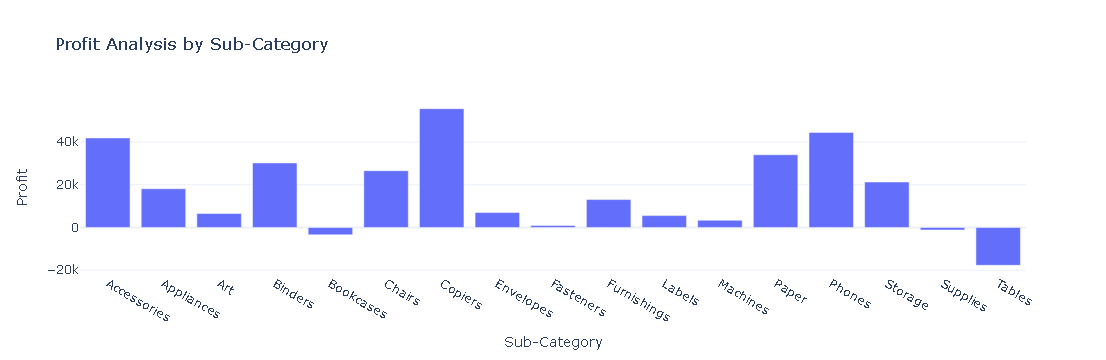

In [20]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='Sub-Category', 
             y='Profit', 
             title='Profit Analysis by Sub-Category')
fig.show()


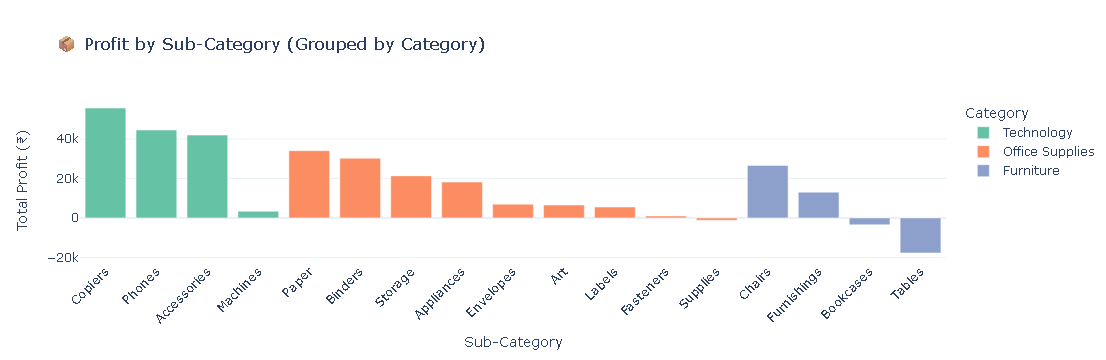

In [21]:
# Group by Category and Sub-Category
subcat_profit = data.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Sort for clean plot
subcat_profit = subcat_profit.sort_values(by='Profit', ascending=False)

# Plot as grouped bar chart
fig = px.bar(
    subcat_profit,
    x='Sub-Category',
    y='Profit',
    color='Category',
    title='📦 Profit by Sub-Category (Grouped by Category)',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(xaxis_tickangle=-45, yaxis_title='Total Profit (₹)')
fig.show()


# 6️⃣ Sales and Profit by Customer Segment
## Compare sales and profit across customer segments.

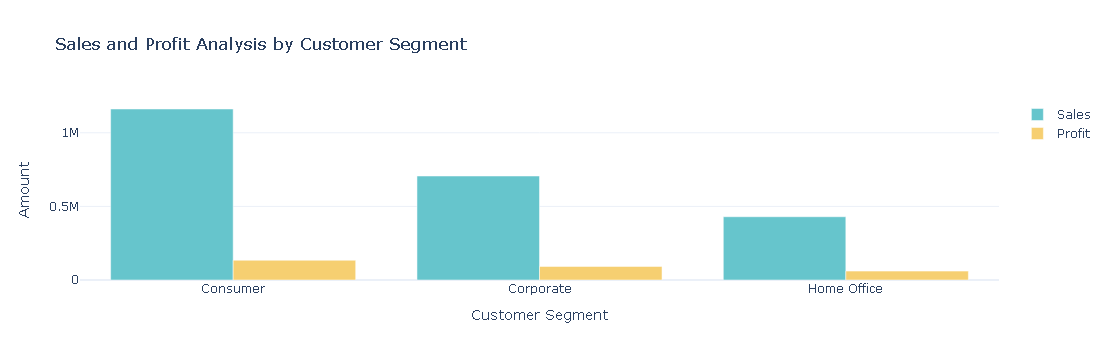

In [22]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()


In [23]:
# Clean column names (always safe)
data.columns = data.columns.str.strip()

# Group by Segment
segment_analysis = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index().round(2)

# Sort by Sales or Profit (optional)
segment_analysis = segment_analysis.sort_values(by='Sales', ascending=False)

print(segment_analysis)


       Segment       Sales     Profit
0     Consumer  1161401.34  134119.21
1    Corporate   706146.37   91979.13
2  Home Office   429653.15   60298.68


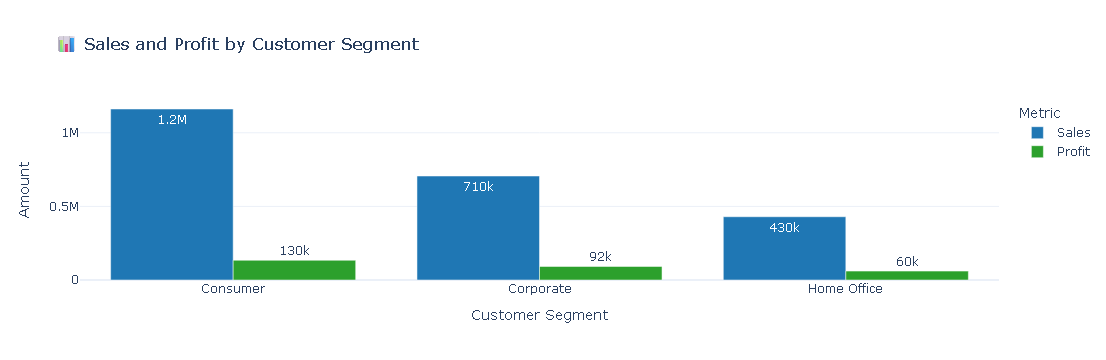

In [24]:
import plotly.express as px

# Melt data for grouped bar chart
segment_melt = segment_analysis.melt(id_vars='Segment', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')

# Grouped bar chart
fig = px.bar(
    segment_melt,
    x='Segment',
    y='Amount',
    color='Metric',
    barmode='group',
    title='📊 Sales and Profit by Customer Segment',
    text_auto='.2s',
    color_discrete_map={'Sales': '#1f77b4', 'Profit': '#2ca02c'}
)
fig.update_layout(yaxis_title='Amount', xaxis_title='Customer Segment')
fig.show()


# 7️⃣ Sales-to-Profit Ratio
## Calculate and analyze the Profit-to-Sales ratio.

In [25]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])


       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


In [26]:
# Clean column names
data.columns = data.columns.str.strip()

# Group and compute ratio
segment_ratio = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Add ratio column
segment_ratio['Profit_to_Sales_Ratio'] = (segment_ratio['Profit'] / segment_ratio['Sales']).round(2)

# Sort
segment_ratio = segment_ratio.sort_values(by='Profit_to_Sales_Ratio', ascending=False)

print(segment_ratio)


       Segment         Sales       Profit  Profit_to_Sales_Ratio
2  Home Office  4.296531e+05   60298.6785                   0.14
1    Corporate  7.061464e+05   91979.1340                   0.13
0     Consumer  1.161401e+06  134119.2092                   0.12
